<a href="https://www.kaggle.com/code/bhavinmoriya/singular-value-decomposition-in-finance?scriptVersionId=115053188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

We shall use SVD to group similar stocks. SVD, which is a technique used in Principal component analysis to represent the data. Basically, we would like to represent the data using less information, technically speaking, represent the matrix (a return on stock price) with a low rank matrix. SVD is used in image and signal processing etc. It is really fantastic tool to be used to produce awesome results. Cheers!

PS. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.5.1 which is incompatible.
apache-beam 2.40.0 requires pyarrow<8.0.0,>=0.15.1, but you have pyarrow 8.0.0 which is incompatible.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as web
# from pandas_datareader import data as web
from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime as dt, timedelta as td
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
tickers = 'msft tsla ko meta pep ibm intc nem au aem gfi'.split()

end = dt.today()
start = end - td(days=5000)
# stocks
df = web.get_data_yahoo(tickers, start, end)['Adj Close']
df.head()

[*********************100%***********************]  11 of 11 completed


,AEM,AU,GFI,IBM,INTC,KO,META,MSFT,NEM,PEP,TSLA
Date,,,,,,,,,,,
2009-04-22,37.595543,27.863920,7.121352,62.061859,10.279502,14.024677,NaN,14.137517,29.210659,32.083138,NaN
2009-04-23,39.066948,28.221378,7.222412,61.377987,10.187665,14.021413,NaN,14.242901,29.484720,32.022949,NaN
2009-04-24,41.108730,29.579721,7.741186,60.567047,10.246703,13.978940,NaN,15.740962,31.433632,32.444210,NaN
2009-04-27,39.298409,29.195454,7.626653,60.488392,10.023663,13.799264,NaN,15.357044,31.730515,32.838737,NaN
2009-04-28,37.446724,28.730759,7.363897,61.692661,9.872784,13.812329,NaN,15.003228,30.466784,33.460606,NaN


In [4]:
# Another way to download data
df = yf.download(tickers, start=start)['Adj Close']
df

[*********************100%***********************]  11 of 11 completed


,AEM,AU,GFI,IBM,INTC,KO,META,MSFT,NEM,PEP,TSLA
Date,,,,,,,,,,,
2009-04-22,37.595528,27.863924,7.121352,62.061871,10.279505,14.024678,NaN,14.137511,29.210657,32.083126,NaN
2009-04-23,39.066948,28.221380,7.222413,61.378021,10.187661,14.021412,NaN,14.242896,29.484728,32.022942,NaN
2009-04-24,41.108734,29.579723,7.741186,60.567059,10.246704,13.978944,NaN,15.740968,31.433626,32.444214,NaN
2009-04-27,39.298405,29.195454,7.626652,60.488369,10.023662,13.799263,NaN,15.357043,31.730536,32.838741,NaN
2009-04-28,37.446743,28.730764,7.363896,61.692692,9.872783,13.812326,NaN,15.003223,30.466784,33.460609,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,51.770000,19.440001,10.600000,140.880005,25.969999,63.340000,117.120003,238.190002,47.500000,181.089996,125.349998
2022-12-23,52.619999,19.430000,10.480000,141.649994,26.090000,63.820000,118.040001,238.729996,47.849998,182.259995,123.150002
2022-12-27,53.540001,19.709999,10.660000,142.419998,25.940001,64.209999,116.879997,236.960007,48.750000,183.070007,109.099998


In [5]:
# returns
df_return = df.pct_change().dropna()
df_return

,AEM,AU,GFI,IBM,INTC,KO,META,MSFT,NEM,PEP,TSLA
Date,,,,,,,,,,,
2012-05-21,0.033987,0.023045,0.041735,0.009598,0.003068,0.006212,-0.109861,0.016399,0.039272,-0.002055,0.043904
2012-05-22,-0.006681,0.004277,-0.006284,-0.004753,-0.004589,-0.004294,-0.089039,0.000336,-0.003800,0.001471,0.070559
2012-05-23,0.054345,0.038046,0.039526,-0.003556,-0.022666,0.004852,0.032258,-0.021841,0.029244,-0.001175,0.007143
2012-05-24,0.010972,-0.003829,0.000000,-0.000153,0.008255,0.013548,0.032187,-0.001374,0.001236,0.011912,-0.023855
2012-05-25,0.004290,-0.006590,0.010647,-0.009129,0.003508,-0.004368,-0.033909,-0.000344,0.003907,-0.002470,-0.015522
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.010134,-0.007657,-0.006560,-0.008864,-0.032054,-0.007210,-0.022044,-0.025529,0.003804,-0.007726,-0.088828
2022-12-23,0.016419,-0.000514,-0.011321,0.005466,0.004621,0.007578,0.007855,0.002267,0.007368,0.006461,-0.017551
2022-12-27,0.017484,0.014411,0.017176,0.005436,-0.005749,0.006111,-0.009827,-0.007414,0.018809,0.004444,-0.114089


**PS :** As meta had some nan values we had reduced pct_change to this size.

In [6]:
# we pick up top 3 cmponents that explains the variance of returns
components = 3
pca = PCA(n_components=components)
pca.fit(df_return)

PCA(n_components=3)

In [7]:
# grab the explained variance and the components
pct = pca.explained_variance_ratio_ 
pca_components = pca.components_

In [8]:
'''percentage of the variance of the total data, in our case, df. Basically, 
pca.explained_variance_ratio_.sum(), much of a data gives the information'''
pca.explained_variance_ratio_.sum()

0.7778617792562925

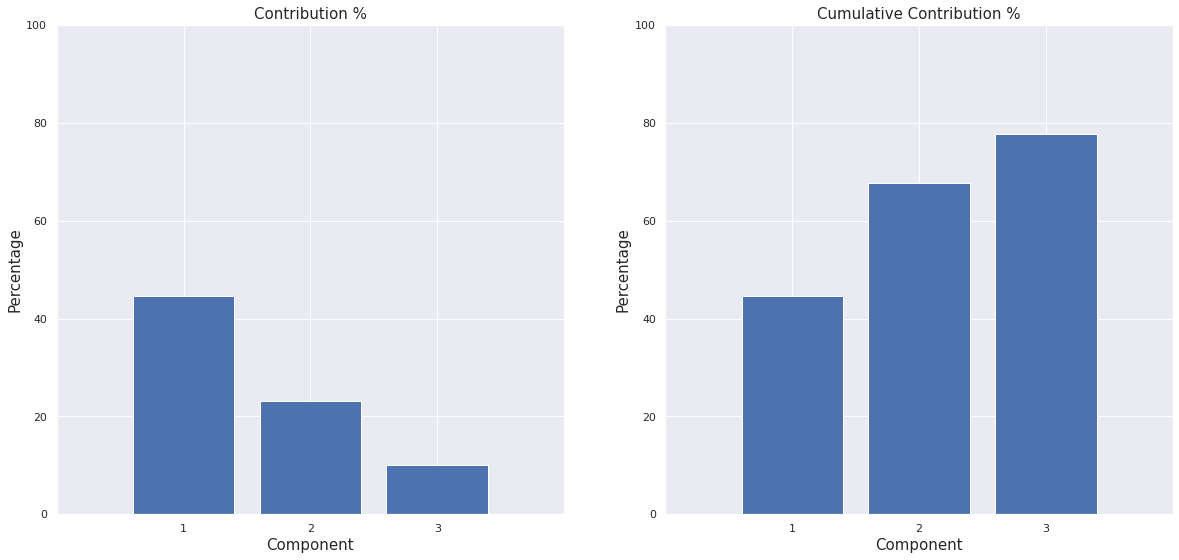

In [9]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct)+1)

fig, ax = plt.subplots(1,2, figsize=(20,9))
# ax = ax.flatten()
ax[0].bar(x, pct * 100, align='center')
ax[0].set_title('Contribution %', fontsize=15)
ax[0].set_xlabel('Component', fontsize=15)
ax[0].set_ylabel('Percentage', fontsize=15);
ax[0].set_xticks(x)
ax[0].set_xlim([0,4])
ax[0].set_ylim([0,100]);

ax[1].bar(x, cum_pct*100, align='center')
ax[1].set_title('Cumulative Contribution %', fontsize=15)
ax[1].set_xlabel('Component', fontsize=15)
ax[1].set_ylabel('Percentage', fontsize=15);
ax[1].set_xticks(x)
ax[1].set_xlim([0,4])
ax[1].set_ylim([0,100]);

In [10]:
X = df_return.values

factor_return = X.dot(pca_components.T)

In [11]:
# similar stocks will be driven by similar factors
factor_return = pd.DataFrame(data=factor_return,
                            index=df_return.index,
                            columns=['f'+str(i) for i in range(components)])

factor_exposure = pd.DataFrame(data=pca_components,
                              index=['f'+str(i) for i in range(components)],
                              columns=df_return.columns).T


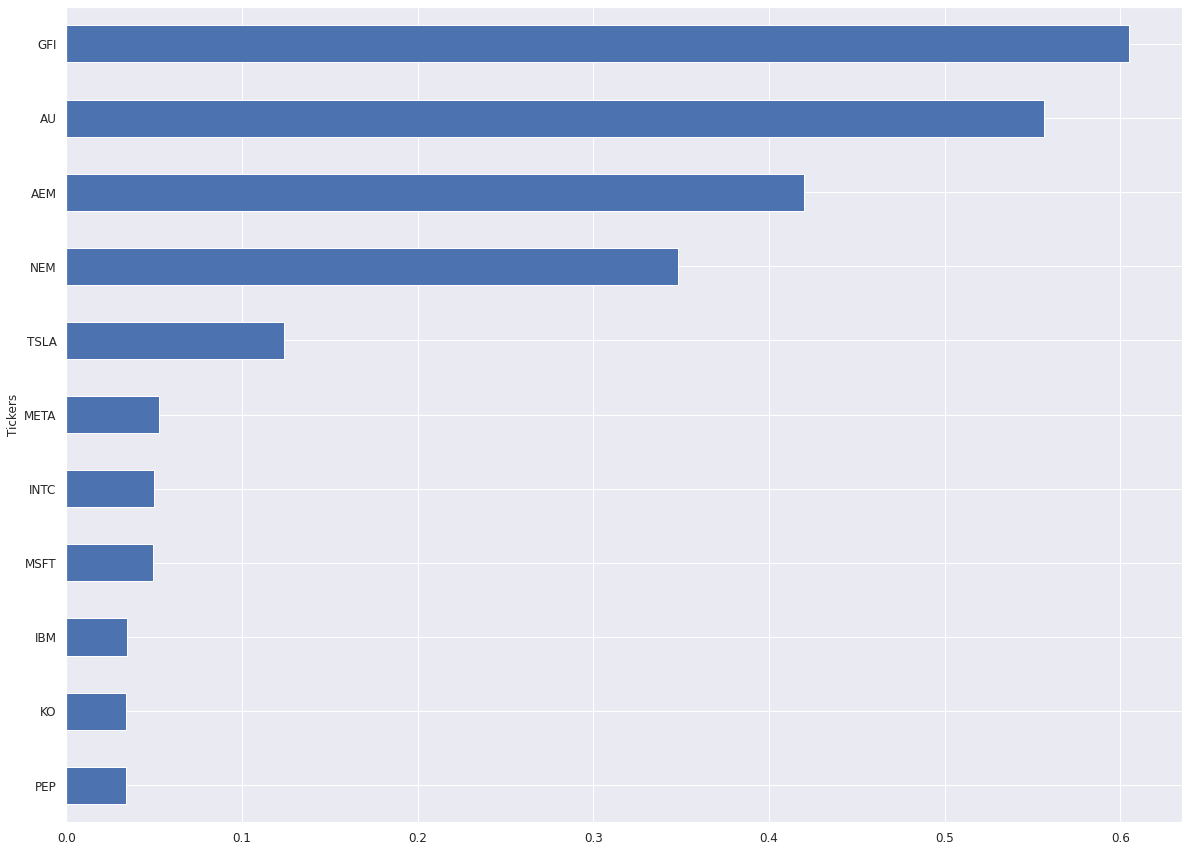

In [12]:
factor_exposure.f0.sort_values().plot(kind='barh',
                                     fontsize=12,
                                     xlabel='Tickers',
                                     figsize=(20,15));

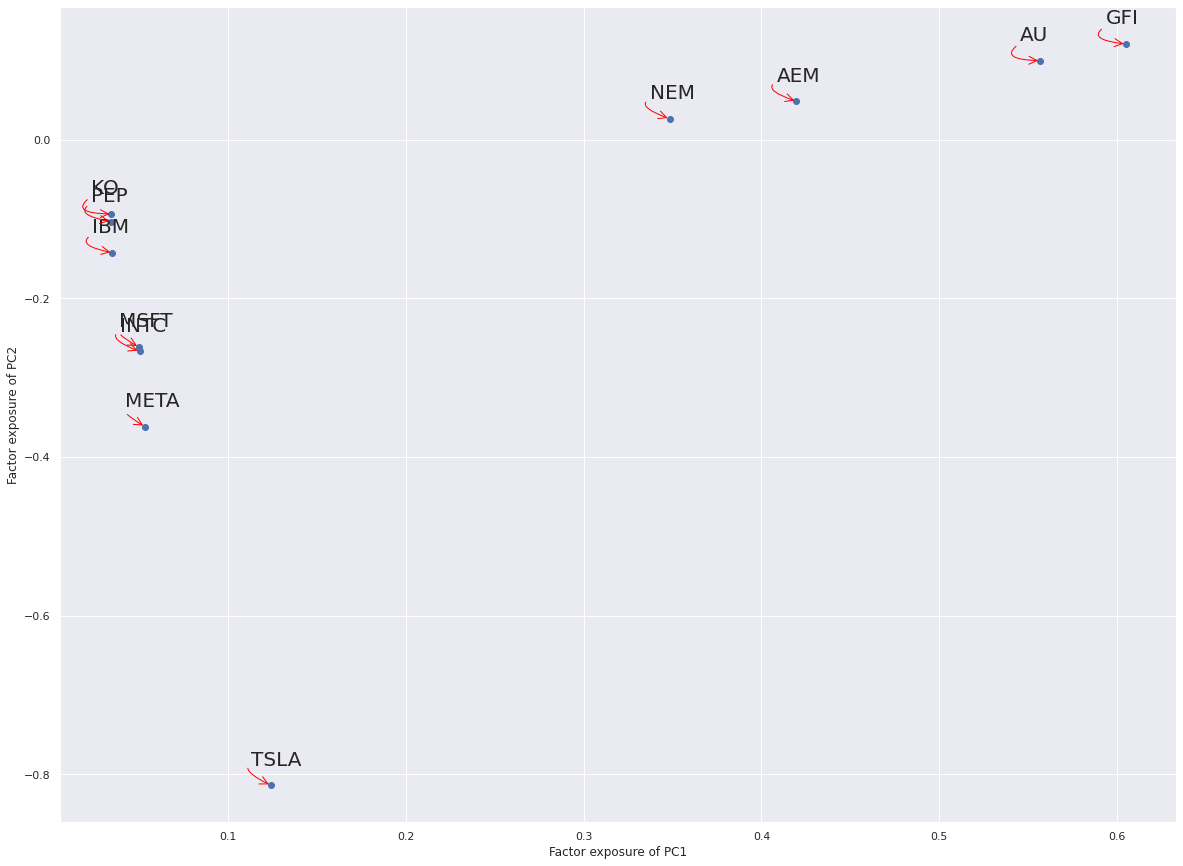

In [13]:
labels = factor_exposure.index
data = factor_exposure.values

plt.figure(figsize=(20,15))
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Factor exposure of PC1')
plt.ylabel('Factor exposure of PC2');

for label, x, y in zip(labels, data[:,0], data[:,1]):
    plt.annotate(
    label,
    xy=(x,y),
    xytext=(-20,20),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->',
                   connectionstyle='arc3,rad=2',
                   color='red',
                  ),
    size=20);


- Gold were up strongly as hedge against the inflation and uncertainty.
- tech was down as lock down put economic health in danger
- these factors are hidden in data, but just three components let us discover all we we want.


In [14]:
def prin_cmp_analysis(df_return=df_return, components=3):
    pca = PCA(n_components=components)
    pca.fit(df_return)
    # grab the explained variance and the components
    pct = pca.explained_variance_ratio_ 
    pca_components = pca.components_
    
    cum_pct = np.cumsum(pct)
    x = np.arange(1, len(pct)+1)

    fig, ax = plt.subplots(3,1, figsize=(20,25))
    ax = ax.flatten()
    ax[0].bar(x, pct * 100, align='center')
    ax[0].set_title('Contribution %', fontsize=15)
    ax[0].set_xlabel('Component', fontsize=15)
    ax[0].set_ylabel('Percentage', fontsize=15);
    ax[0].set_xticks(x)
#     ax[0].set_xlim([0,4])
#     ax[0].set_ylim([0,100]);

    ax[1].bar(x, cum_pct*100, align='center')
    ax[1].set_title('Cumulative Contribution %', fontsize=15)
    ax[1].set_xlabel('Component', fontsize=15)
    ax[1].set_ylabel('Percentage', fontsize=15);
    ax[1].set_xticks(x)
#     ax[1].set_xlim([0,4])
#     ax[1].set_ylim([0,100]);
    X = df_return.values

    factor_return = X.dot(pca_components.T)
    
    # similar stocks will be driven by similar factors
    factor_return = pd.DataFrame(data=factor_return,
                                index=df_return.index,
                                columns=['f'+str(i) for i in range(components)])

    factor_exposure = pd.DataFrame(data=pca_components,
                                  index=['f'+str(i) for i in range(components)],
                                  columns=df_return.columns).T
#     fig, ax = plt.subplots(1,1,figsize=(20,15))
    factor_exposure.f0.sort_values().plot(kind='barh',
                                     fontsize=12,
#                                      xlabel='Tickers',
#                                      figsize=(20,15),
                                        ax=ax[2]);
    ax[2].set_xlabel('Factor Exposure of PC1', fontsize=15)
    ax[2].set_ylabel('Tickers', fontsize=15)
    plt.tight_layout();
    
    labels = factor_exposure.index
    data = factor_exposure.values

    plt.figure(figsize=(20,15))
    plt.scatter(data[:,0], data[:,1])
    plt.xlabel('Factor exposure of PC1', fontsize=15)
    plt.ylabel('Factor exposure of PC2', fontsize=15);

    for label, x, y in zip(labels, data[:,0], data[:,1]):
        plt.annotate(
        label,
        xy=(x,y),
        xytext=(-20,20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->',
                       connectionstyle='arc3,rad=2',
                       color='red',
                      ),
        size=20);
    return pct, pca_components

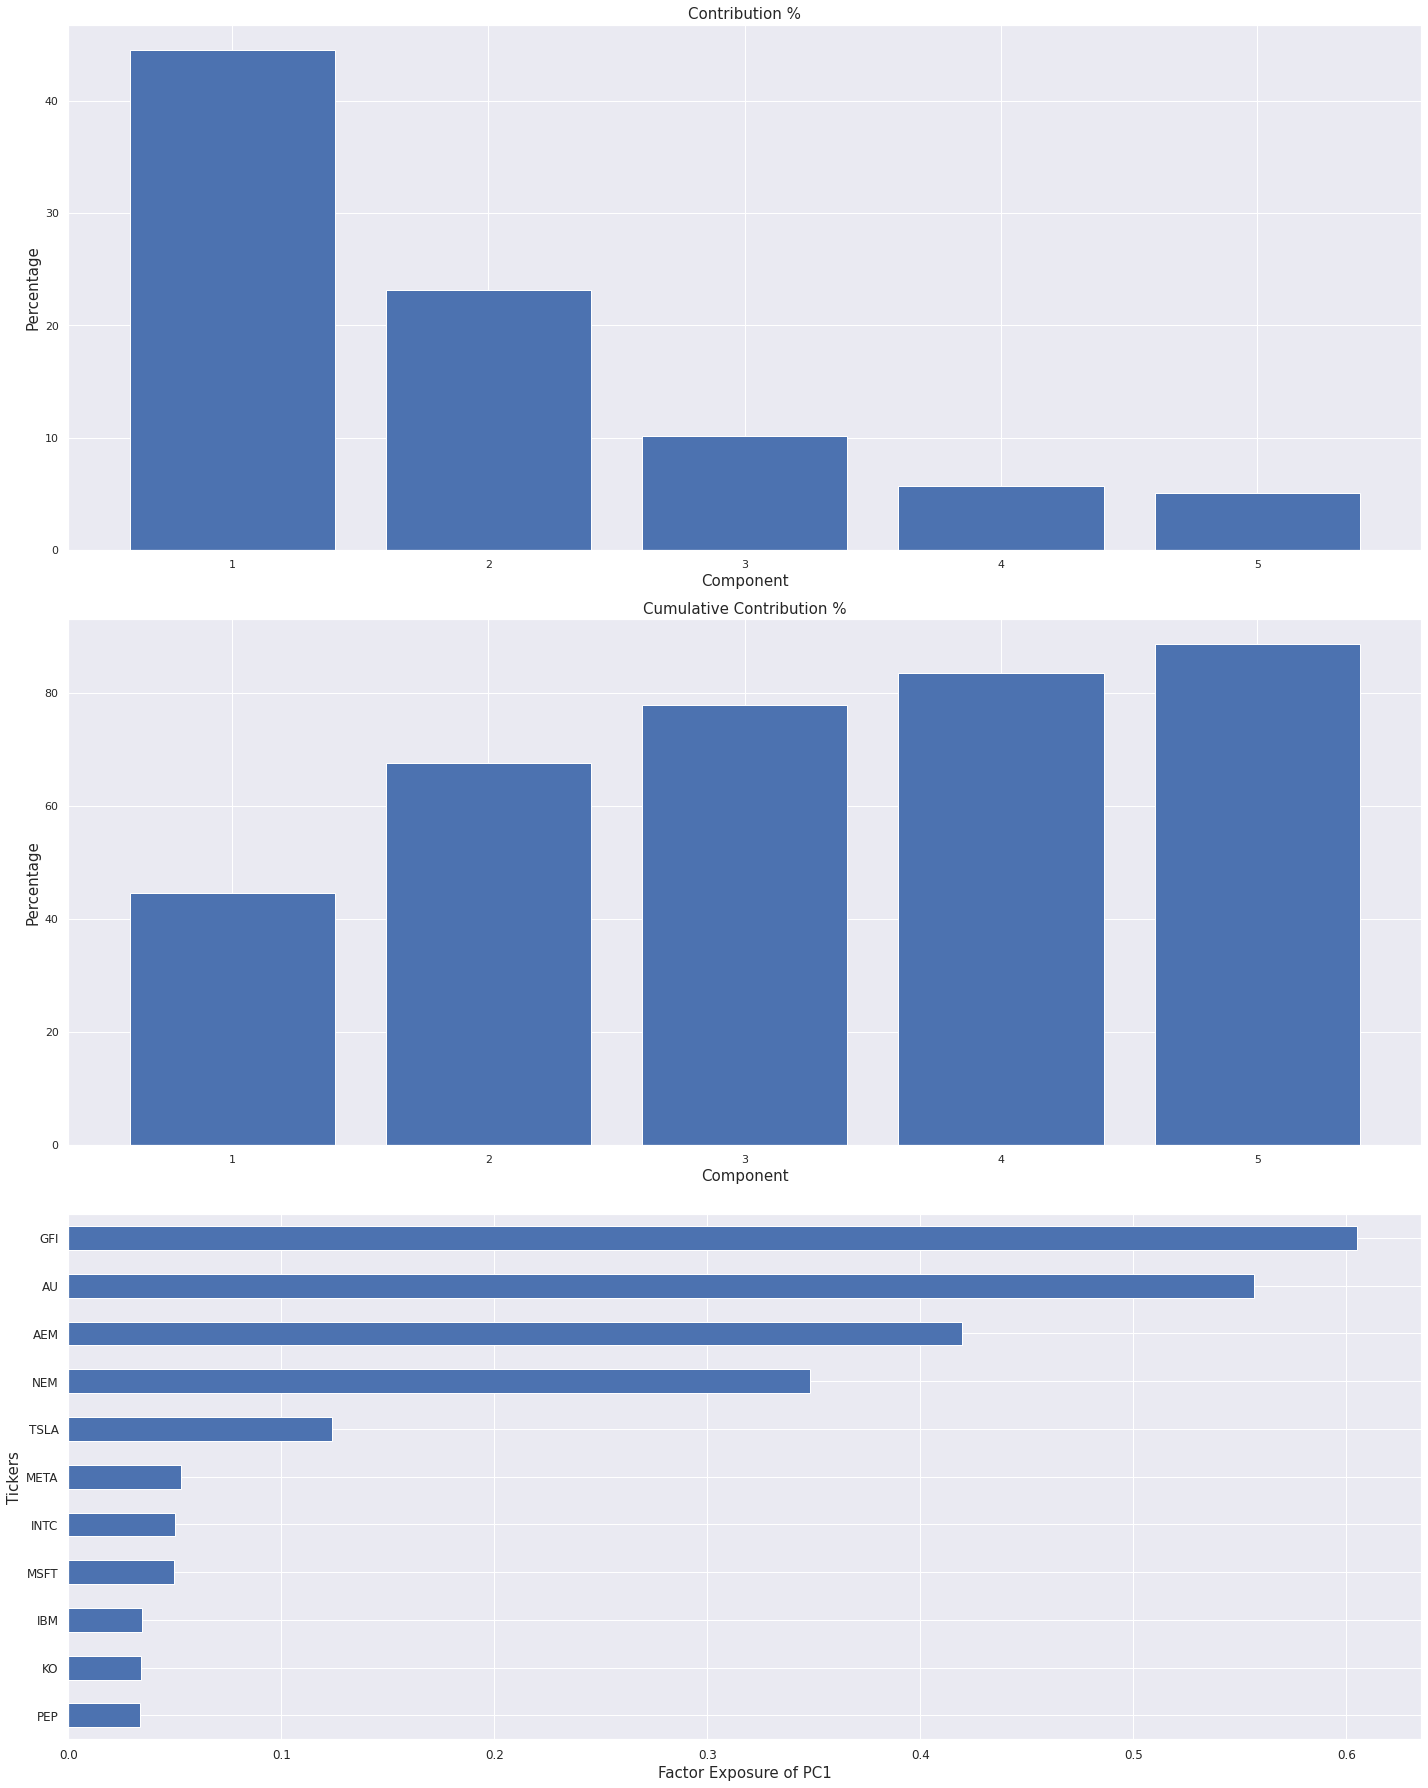

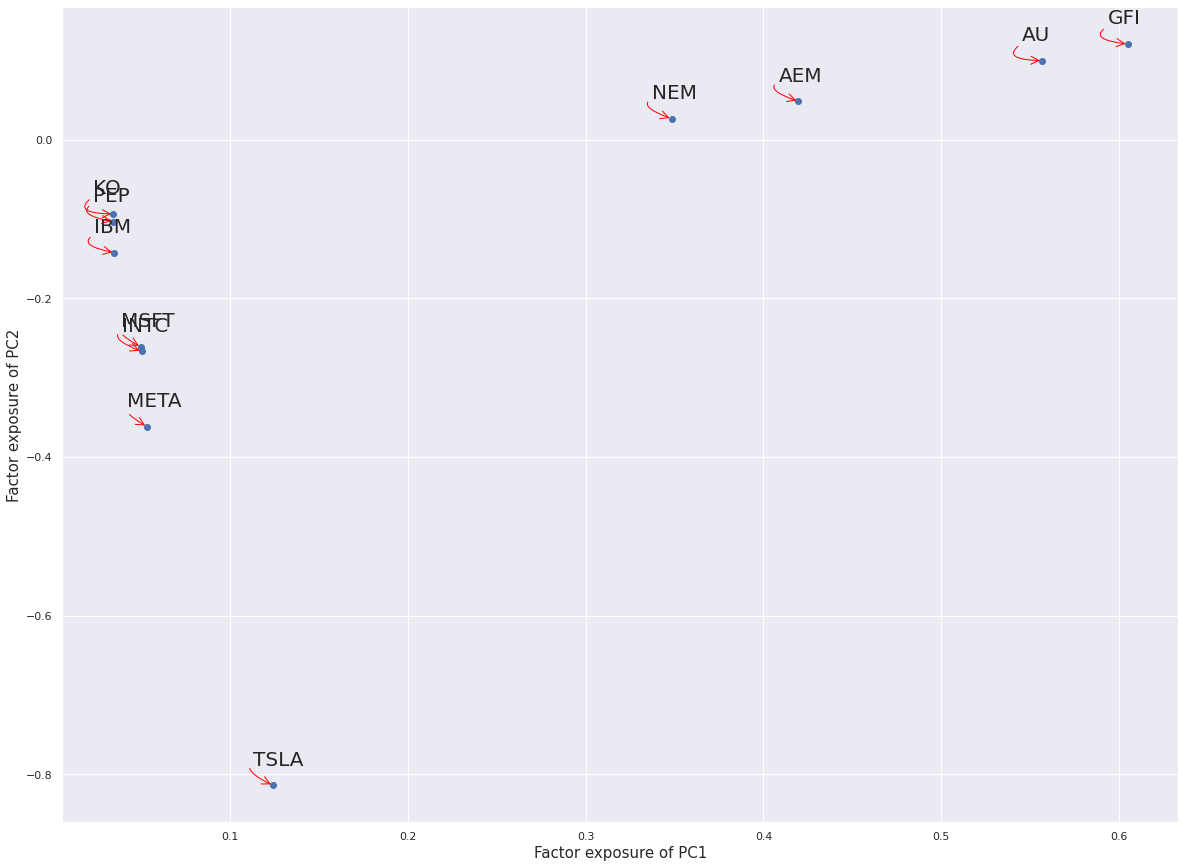

In [15]:
a, b = prin_cmp_analysis(df_return, 5)